# Analisis Exploratorio de conjuntos de Datos reales

### Dataset: Credit Card Fraud Detection
**Link:https://www.kaggle.com/c/ieee-fraud-detection/overview**


### Caracteristicas:

**TransactionID**: Identificador de la transaccion(numericos).

**TransactionDT**: TimeDelta de una fecha y hora de referencia(el dataset es de 6 meses de datos y el timedelta parece ser segurndos por dia por eso empieza en 86400 que es 1 dia en segundos y acaba en 183 dias)(numericos).

**TransactionAmt**: Monto de la transaccion en USD(numericos).

**ProductCD**: Codigo de producto(W,C,Other).

**card1,card2,card3,card4,card5,card6**: Informacion de la tarjeta de pago,tipo,categoria,pais,etc(numericos algunos).

**addr1,addr2**: direccion de region y pais de facturacion(donde se hace la compra)(numericos)

**dist1,dist2**: distancia(numericos)

**P_emaildomain,R_emaildomain**: Dominio del correo electronico, del comprador(purchaser) y del destinatario(recipient).

**M1,M2,M3,M4,M5,M6,M7,M8,M9**: Match,coincidencias como nombre de la tarjeta y direccion(categoricos).

**C1,..,C14**: Counting,como cantidad de direcciones asociadas a la tarjeta de pago,etc(numericos).

**D1,..,D15**: TimeDelta como dias entre transacciones anteriores(numericos).

**V1,..,V399**: Vesta variables, como clasificacion, conteo y otras relaciones entre entidades(numericos).

**isFraud**: Tarjet, variable objetivo.

**Consideraciones:**

-No solo contiene transferencia de dinero sino tambien compra de regalos(como reservas de hoteles) por eso la doble direccion de correo y algunas no tiene R_emaildomain porque no son para nadie.

-Los codigos de productos no son necesariamente fisicos tambien pueden ser servicios.

-Las direcciones son del comprador el addr1=region de facturacion , addr2=pais de facturacion

-Las variables V tienen informacion como: Por ejemplo, cuántas veces apareció la tarjeta de pago asociada con una IP y un correo electrónico o dirección en un rango de tiempo de 24 horas,Todas las características de Vesta se derivaron como numéricas. Algunas de ellas son recuentos de órdenes dentro de una agrupación, un período de tiempo o condición, por lo que el valor es finito y tiene orden (o clasificación). No recomendaría tratar ninguna de ellas. como categórico. Si alguno de ellos resultó en binario por casualidad, tal vez valga la pena intentarlo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
#Lectura de los datos del archivo csv
data = pd.read_csv('Data/credit_dataset_2_transaccion.csv');

In [4]:
data.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
print(data.shape)

(590540, 394)


In [4]:
# Seleccionar columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Columnas numéricas:")
print(numeric_columns)
print(f"Total de columnas numéricas: {len(numeric_columns)}")

# Seleccionar columnas categóricas
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nColumnas categóricas:")
print(categorical_columns)
print(f"Total de columnas categóricas: {len(categorical_columns)}")

Columnas numéricas:
Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=380)
Total de columnas numéricas: 380

Columnas categóricas:
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
      dtype='object')
Total de columnas categóricas: 14


Analisis variable Tarjet

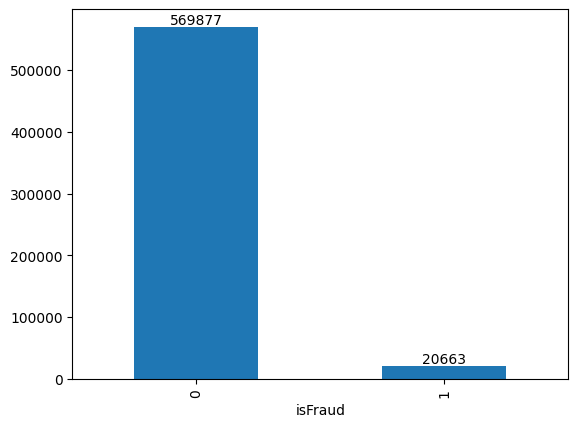

isFraud
0    569877
1     20663
Name: count, dtype: int64


In [5]:
fraud_counts = data.isFraud.value_counts()
fraud_counts.plot(kind='bar')

# Adding the counts on top of the bars
for i, count in enumerate(fraud_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

fraudes=data.isFraud.value_counts()
print(fraudes)

Analisis de las caracteristicas

In [ ]:
columasInteres=data[['TransactionDT','TransactionAmt','card4','card6','P_emaildomain','R_emaildomain','addr1','addr2','dist1','dist2','isFraud']]
print(columasInteres.describe())

       TransactionDT  TransactionAmt          addr1          addr2  \
count   5.905400e+05   590540.000000  524834.000000  524834.000000   
mean    7.372311e+06      135.027176     290.733794      86.800630   
std     4.617224e+06      239.162522     101.741072       2.690623   
min     8.640000e+04        0.251000     100.000000      10.000000   
25%     3.027058e+06       43.321000     204.000000      87.000000   
50%     7.306528e+06       68.769000     299.000000      87.000000   
75%     1.124662e+07      125.000000     330.000000      87.000000   
max     1.581113e+07    31937.391000     540.000000     102.000000   

               dist1         dist2        isFraud  
count  238269.000000  37627.000000  590540.000000  
mean      118.502180    231.855423       0.034990  
std       371.872026    529.053494       0.183755  
min         0.000000      0.000000       0.000000  
25%         3.000000      7.000000       0.000000  
50%         8.000000     37.000000       0.000000  
75%  

C:\Users\Angel\AppData\Local\Temp\ipykernel_20176\1007603982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_transactions['TransactionDay'] = fraudulent_transactions['TransactionDT'] // (24 * 60 * 60)


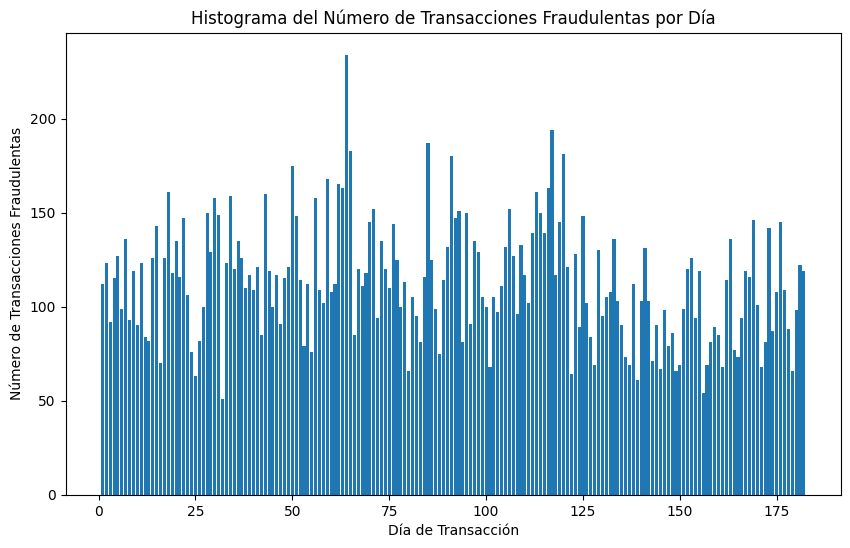

C:\Users\Angel\AppData\Local\Temp\ipykernel_20176\1007603982.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_fraudulent_transactions['TransactionDay'] = non_fraudulent_transactions['TransactionDT'] // (24 * 60 * 60)


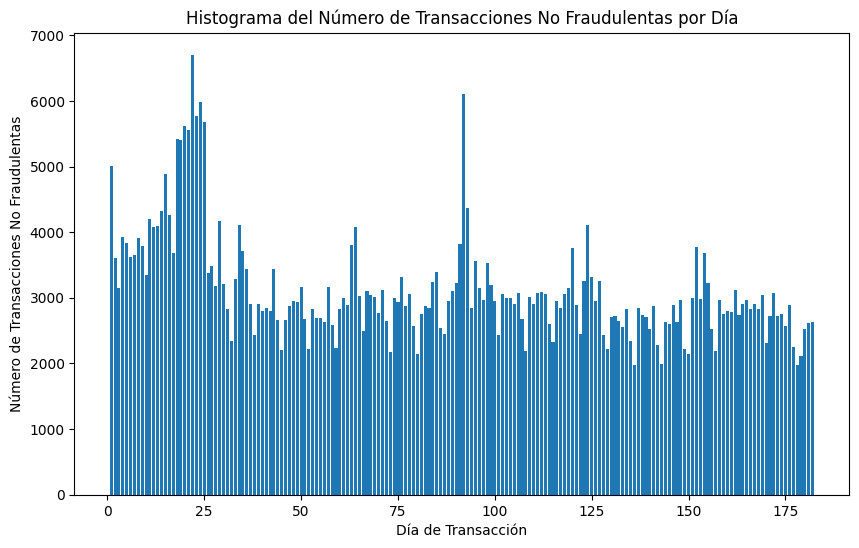

In [20]:
# Filtrar transacciones fraudulentas
fraudulent_transactions = data[data['isFraud'] == 1]
fraudulent_transactions['TransactionDay'] = fraudulent_transactions['TransactionDT'] // (24 * 60 * 60)

# Agrupar por días y contar el número de transacciones fraudulentas
fraudulent_transactions_per_day = fraudulent_transactions.groupby('TransactionDay').size()

# Graficar el número de transacciones fraudulentas por día como histograma horizontal
plt.figure(figsize=(10, 6))
plt.bar(fraudulent_transactions_per_day.index, fraudulent_transactions_per_day.values)
plt.ylabel('Número de Transacciones Fraudulentas')
plt.xlabel('Día de Transacción')
plt.title('Histograma del Número de Transacciones Fraudulentas por Día')
plt.show()

# Filtrar transacciones no fraudulentas
non_fraudulent_transactions = data[data['isFraud'] == 0]
non_fraudulent_transactions['TransactionDay'] = non_fraudulent_transactions['TransactionDT'] // (24 * 60 * 60)

# Agrupar por días y contar el número de transacciones no fraudulentas
non_fraudulent_transactions_per_day = non_fraudulent_transactions.groupby('TransactionDay').size()

# Graficar el número de transacciones no fraudulentas por día como histograma horizontal
plt.figure(figsize=(10, 6))
plt.bar(non_fraudulent_transactions_per_day.index, non_fraudulent_transactions_per_day.values)
plt.ylabel('Número de Transacciones No Fraudulentas')
plt.xlabel('Día de Transacción')
plt.title('Histograma del Número de Transacciones No Fraudulentas por Día')
plt.show()

In [13]:
data.value_counts('card6')

card6
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: count, dtype: int64

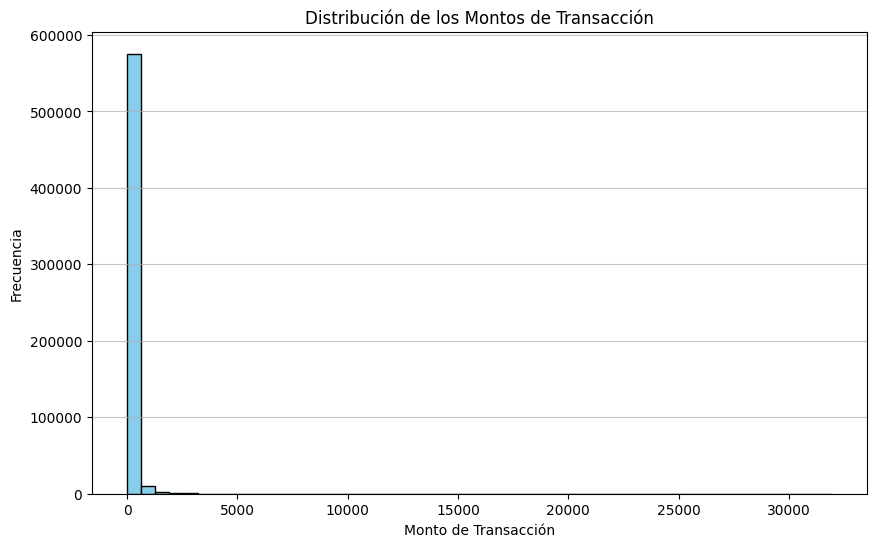

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data["TransactionAmt"], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de los Montos de Transacción')
plt.xlabel('Monto de Transacción')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [21]:
data.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

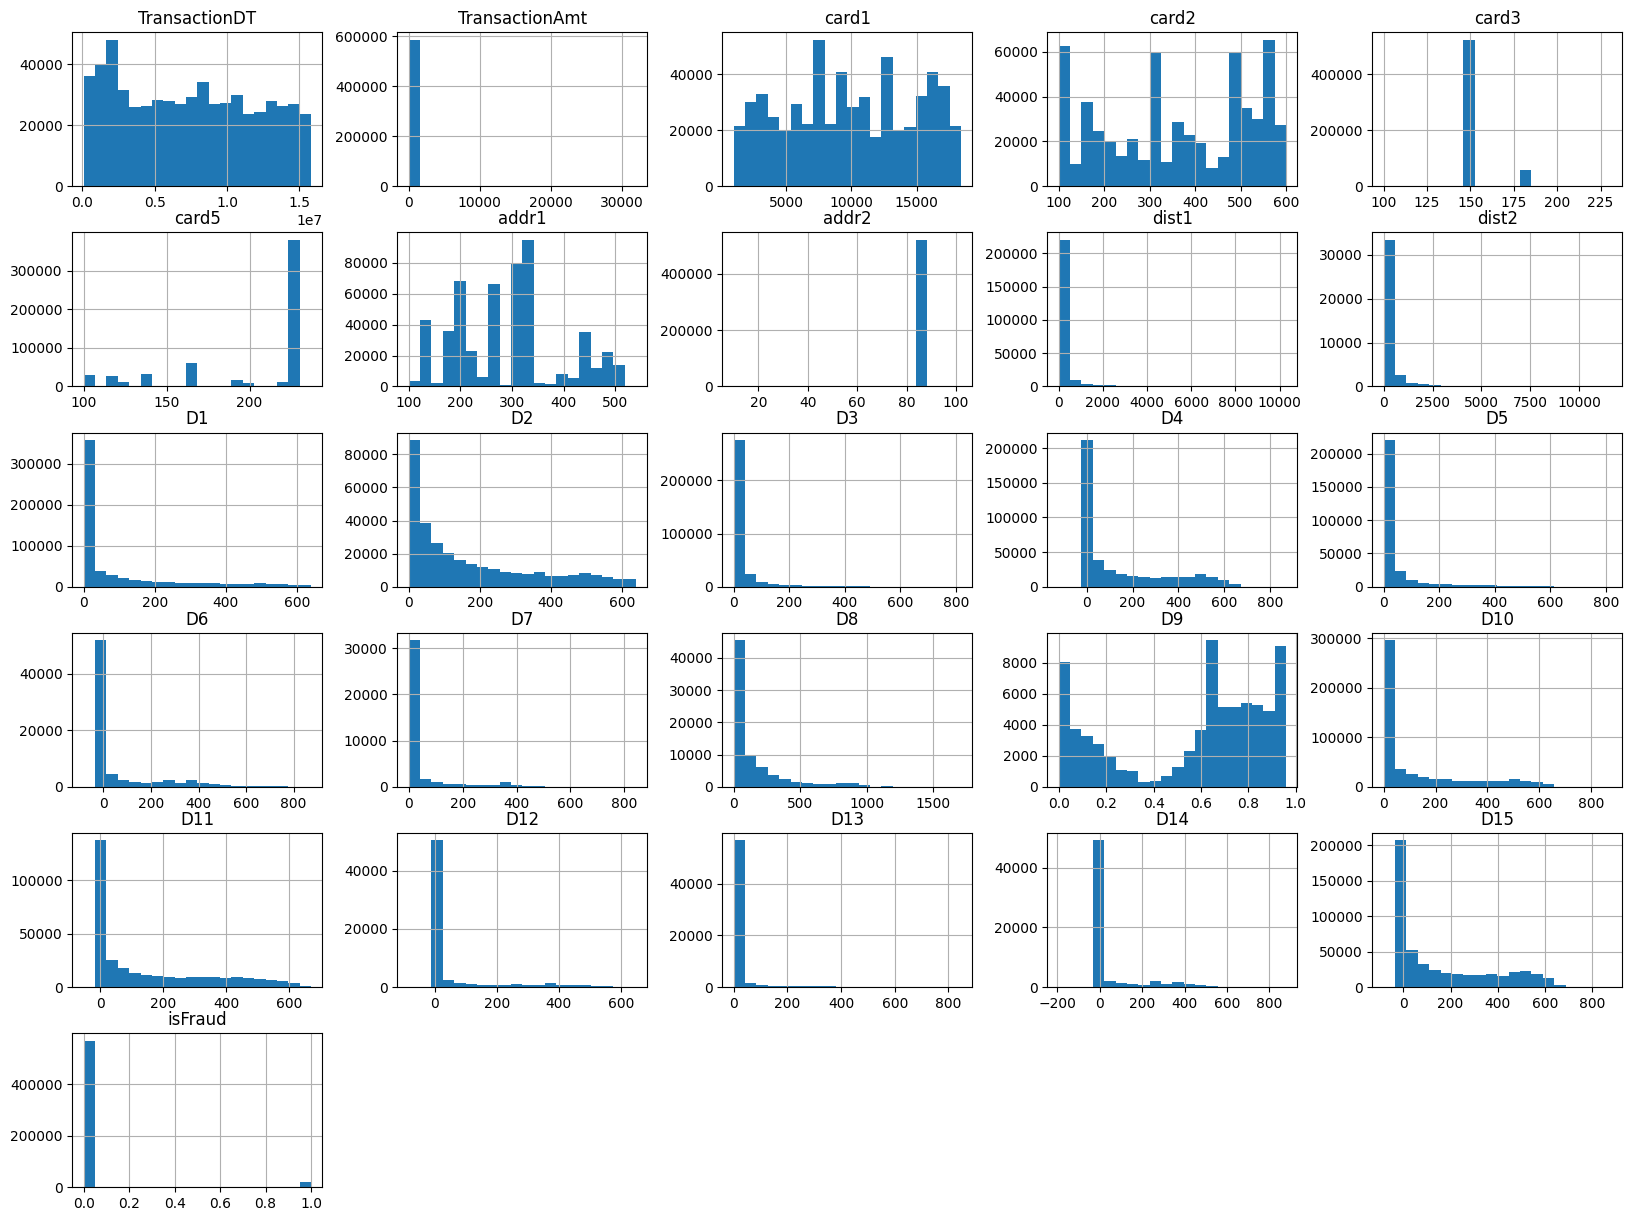

In [23]:
columnas_a_graficar=data[['TransactionDT','TransactionAmt','card1','card2', 'card3', 'card5','addr1','addr2','dist1','dist2','D1','D2'
                          ,'D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','isFraud']]

columnas_a_graficar.hist(bins=20, figsize=(20, 15))
plt.show()

In [1]:
columnas_a_graficar=data[['TransactionDT','TransactionAmt','card1','card2', 'card3', 'card5','addr1','addr2','dist1','dist2','D1','D2'
                          ,'D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15']]
                         # ,'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','isFraud']]

plt.figure(figsize=(20,16))
sns.heatmap(columnas_a_graficar,
            annot=True,
            cmap='Blues')
plt.show()

NameError: name 'data' is not defined